# Grip :The Spark Foundation

# Task:Prediction using Decision Tree
    


# Create the Decision Tree classifier and visualize it graphically.

● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

# Author : Rajkaur Prakash Kamble

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [188]:
#Lets Load the dataset
data=pd.read_csv("E:\Downloads Files\Iris.csv")
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [189]:
#Removing the ID column from the dataset baecause we are not going to use this column for further analysis
data.drop("Id",axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis

In [190]:
data.shape

(150, 5)

There are 150 rows and 5 columns present in the dataset

In [191]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [192]:
#Finding the summary statistics of the data
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [193]:
#Finding the correlation
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [194]:
#check for unique values in the data
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [195]:
#To check is there any missing values present in the dataset
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

From the above we can see that there are no missing values present in the dataset

# Data visualization

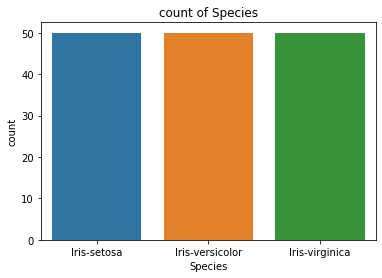

In [196]:
#Count plot
plt.title("count of Species")
sns.countplot(x="Species",data=data) 
plt.show()

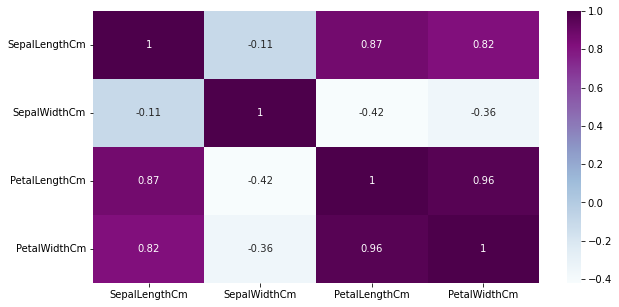

In [197]:
# Finding the correlation between the variable
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap="BuPu")
plt.show()

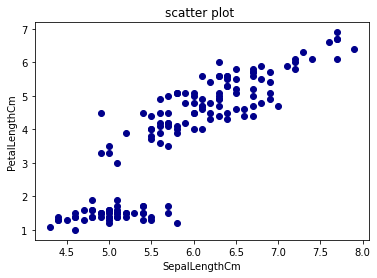

In [198]:
#Scatter Plot 
plt.scatter(data["SepalLengthCm"],data["PetalLengthCm"],color="darkblue")
plt.title("scatter plot ")
plt.xlabel("SepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.show()


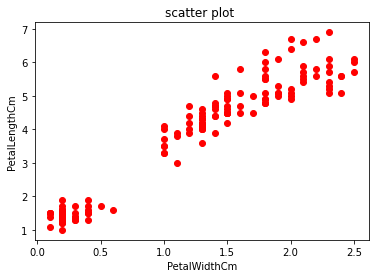

In [199]:
plt.scatter(data["PetalWidthCm"],data["PetalLengthCm"],color="red")
plt.title("scatter plot ")
plt.xlabel("PetalWidthCm")
plt.ylabel("PetalLengthCm")
plt.show()

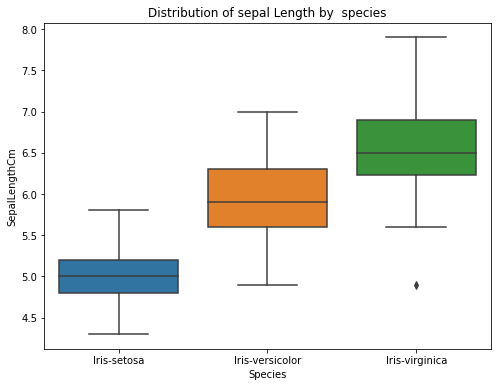

In [200]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Species",y="SepalLengthCm",data=data)
plt.title("Distribution of sepal Length by  species")
plt.show()

From The above plot we can say that the iris virginica has generally the largest sepal length among the three species

# First we assign the categorical variables i.e species column to numerical variables by using label encoder

In [201]:
#Import label encoder
from sklearn.preprocessing import LabelEncoder

In [202]:
label=LabelEncoder()
type(label)

sklearn.preprocessing._label.LabelEncoder

In [203]:
label.fit(data['Species'])  

LabelEncoder()

In [204]:
label.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [205]:
label.transform(data["Species"])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [206]:
data['label_species']=label.transform(data["Species"])

In [207]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,label_species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [208]:
data.drop(["Species"],axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label_species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [209]:
#Splitting the dependant and independent variable
x=data.iloc[:,:-2]
y=data["label_species"]

In [210]:
# Let's explore our features.
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [211]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: label_species, Length: 150, dtype: int32

In [212]:
# import the function
from sklearn.model_selection import train_test_split
# Split our data into the training sets and the testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3)

# Model Building

In [213]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

# Train our model with our training data.
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [214]:
#prediction¶
y_pred=dtree.predict(x_test)R
y_pred

array([0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2,
       2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 0, 2, 0])

In [215]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,accuracy_score,f1_score

# Accuracy of the model


In [230]:
c_m=confusion_matrix(y_test,y_pred)
pre_score=precision_score(y_test,y_pred,average="weighted")
recall_score=recall_score(y_test,y_pred,average="weighted")
acc_score=accuracy_score(y_test,y_pred)
f1_score=f1_score(y_test,y_pred,average="weighted")
print(f'precision_score:{pre_score}')
print(f'recall_score:{recall_score}')
print(f'f1_score:{f1_score}')

precision_score:0.975877192982456
recall_score:0.9736842105263158
f1_score:0.9736842105263158


As the accuracy of the model is 97% Decision Tree Classifier model is well fitted to the data.

# Data Visualization Tree

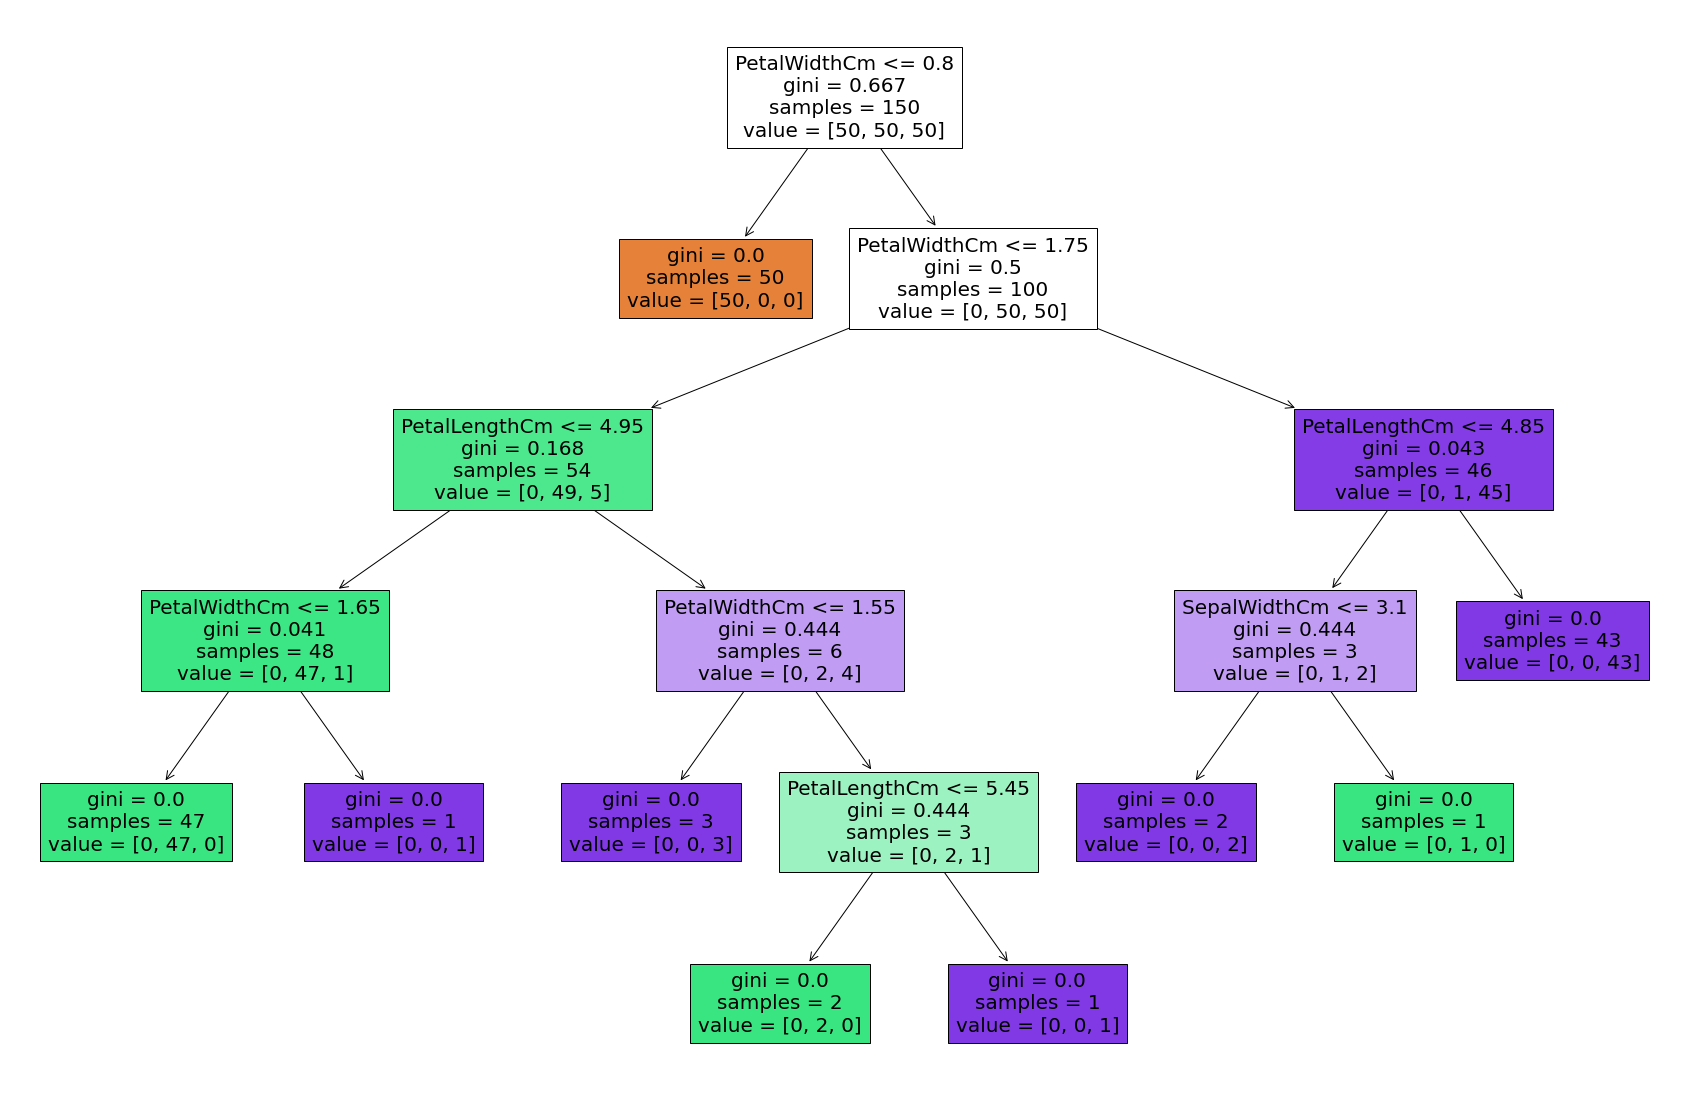

In [231]:
from sklearn import tree
features=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
x=data[features]
y=data["Species"]
dtree=DecisionTreeClassifier()
dtree=dtree.fit(x,y)
plt.figure(figsize=(30,20))
tree.plot_tree(dtree,feature_names=features,filled=True)
plt.show()

# Thank you